<a href="https://colab.research.google.com/github/rubbybbs/ProbML-book-solution/blob/main/ch03/3.6.5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 3.6.5
编程实现Lasso的ISTA和FISTA算法，并在UCI Housing数据集上对比算法的收敛时间。

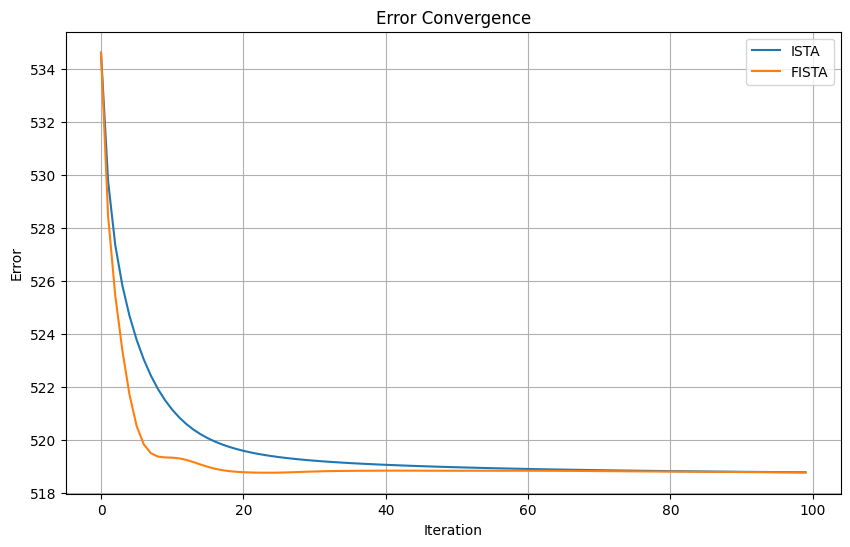

In [9]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# 加载数据集
# from sklearn import datasets
# boston = datasets.load_boston()
# X = boston.data
# y = boston.target

# 加载数据集
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
X = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
y = raw_df.values[1::2, 2]


# 数据预处理
scaler = StandardScaler()
X = scaler.fit_transform(X)

def soft_thresh(x, l):
    return np.sign(x) * np.maximum(np.abs(x) - l, 0)

def compute_error(X, y, w, l):
    return np.linalg.norm(X @ w - y) + l * np.linalg.norm(w, 1)

def ista(X, y, l, max_iter):
    m, n = X.shape
    w = np.zeros(n)
    L = np.linalg.norm(X) ** 2
    error = []
    for _ in range(max_iter):
        w = soft_thresh(w - (1/L) * X.T @ (X @ w - y), l / L)
        error.append(compute_error(X, y, w, l))
    return w, error

def fista(X, y, l, max_iter):
    m, n = X.shape
    w = np.zeros(n)
    w_prev = np.zeros(n)
    L = np.linalg.norm(X) ** 2
    tau = 1
    error = []
    for _ in range(max_iter):
        mu = w + (tau - 1) / tau * (w - w_prev)
        w_prev = w
        w = soft_thresh(mu - (1/L) * X.T @ (X @ mu - y), l / L)
        tau = (np.sqrt(1 + 4 * tau ** 2) + 1) / 2
        error.append(compute_error(X, y, w, l))
    return w, error


l = 5e-2        # lambda
max_iter = 100  # 最大迭代步数

# ISTA
w_ista, ista_error = ista(X, y, l, max_iter)

# FISTA
w_fista, fista_error = fista(X, y, l, max_iter)

plt.figure(figsize=(10,6))

plt.plot(range(len(ista_error)), ista_error, label='ISTA')
plt.plot(range(len(fista_error)), fista_error, label='FISTA')
plt.xlabel('Iteration')
plt.ylabel('Error')
plt.title('Error Convergence')
plt.legend()
plt.grid(True)
plt.show()
